## Observations and Insights 

1) Out of the four subsets of Drug Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin, Ramicane appears to be the most effective. This is because the max, min, median, and lower and upper quartiles tumor volumes are all lower than the others and the data has less variations which is evident by how narrow the box and whisker plot is.

<br>2) Infubinol not only had the highest numbers in terms of tumor volume, but it also had the most variability, which means it is not as effective and more unpredictable. It was the only regimen that produces an outlier. 

<br>3) Capomulin was an effective drug as the correlation coefficient of 0.87 between weight and tumor volume shows. Using mouse m601 as an example, it is clear that the tumor volume decreased significantly over time, and the scatter plot shows that the relationship is present for the other mice in the group as well. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="inner")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_of_mice = len(merged_df["Mouse ID"].unique())
print(num_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop(merged_df[merged_df['Mouse ID']=='g989'].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_of_clean_mice = len(cleaned_df['Mouse ID'].unique())
print(num_of_clean_mice)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df = cleaned_df.groupby(['Drug Regimen'])
# print(mouseid_df['Tumor Volume (mm3)'].describe())
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avg_volume = drug_df.mean()['Tumor Volume (mm3)']
mid_volume = drug_df.median()['Tumor Volume (mm3)']
var_volume = drug_df.var()['Tumor Volume (mm3)']
std_volume = drug_df.std()['Tumor Volume (mm3)']
sem_volume = drug_df.sem()['Tumor Volume (mm3)']

summary_df = pd.concat([avg_volume, mid_volume, var_volume, std_volume, sem_volume], axis=1)
summary_df.columns = ['mean', 'median', 'var',"std", 'sem']
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints by Drug Regimen')

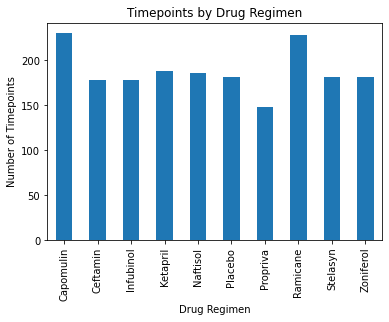

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_df['Timepoint'].count().plot.bar()
plt.ylabel('Number of Timepoints')
plt.title('Timepoints by Drug Regimen')

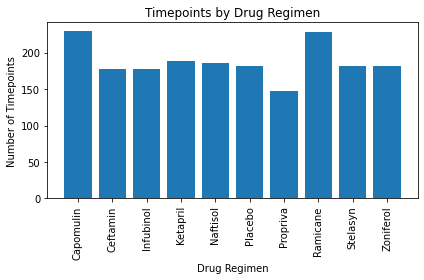

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_df.count().index, drug_df['Timepoint'].count())
plt.xticks(rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Timepoints by Drug Regimen')
plt.tight_layout()

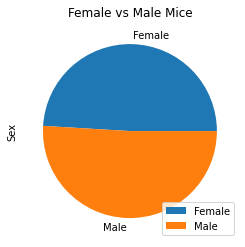

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = cleaned_df.groupby('Sex')
sex_df.count().plot.pie(y='Mouse ID')
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.legend(loc=4)

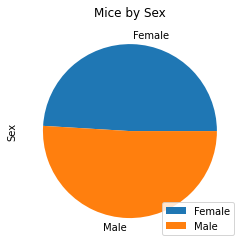

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df.count()['Mouse ID'], labels = ['Female', 'Male'])
plt.ylabel('Sex')
plt.title('Mice by Sex')
plt.legend(loc=4)

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_s = cleaned_df.groupby("Mouse ID")['Timepoint'].max()
mouse_df = pd.DataFrame(mouse_s)
mouse_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = pd.merge(cleaned_df, mouse_df, on=('Mouse ID', 'Timepoint'))
treatment_df = max_df.loc[(max_df['Drug Regimen'] =='Capomulin') |(max_df['Drug Regimen'] == 'Ramicane')|(max_df['Drug Regimen'] =='Infubinol')|(max_df['Drug Regimen'] == 'Ceftamin'), :]
treatment_df.sort_values(by=['Drug Regimen', 'Tumor Volume (mm3)'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
3,m601,Capomulin,Male,22,17,45,28.430964,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
44,a444,Ramicane,Female,10,25,45,43.047543,0
47,w678,Ramicane,Female,5,24,5,43.166373,0
46,r921,Ramicane,Female,5,25,30,43.419381,1
48,y449,Ramicane,Male,19,24,15,44.183451,0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_dataframes= []
for treatment in treatments:
    treatment_dataframes.append(treatment_df.loc[treatment_df['Drug Regimen'] == treatment, :])


# Create empty list to fill with tumor vol data (for plotting)
capo_data = treatment_dataframes[0]['Tumor Volume (mm3)']
rami_data = treatment_dataframes[1]['Tumor Volume (mm3)']
infu_data = treatment_dataframes[2]['Tumor Volume (mm3)']
ceft_data = treatment_dataframes[3]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    quartiles = treatment_df.loc[treatment_df['Drug Regimen']==treatment,:]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(treatment)
    print("--------------------------------------------------")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The outlier lower bound is {lower_bound}.")
    print(f"The outlier upper bound is {upper_bound}.")
    print("--------------------------------------------------")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
--------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
The outlier lower bound is 20.70456164999999.
The outlier upper bound is 51.83201549.
--------------------------------------------------
Ramicane
--------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
The outlier lower bound is 17.912664470000003.
The outlier upper bound is 54.30681135.
--------------------------------------------------
Infubinol
--------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range is: 11.477135160000003
The the median of Infubinol is:

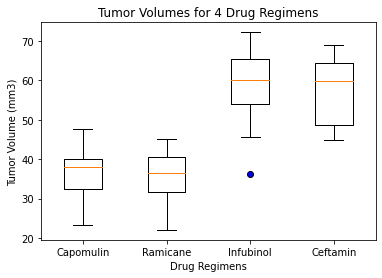

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([capo_data, rami_data, infu_data, ceft_data], flierprops = {'markerfacecolor':'b'})
plt.xticks([1,2,3,4],treatments)
plt.title("Tumor Volumes for 4 Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

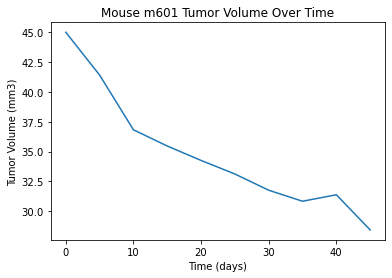

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == "m601", :]
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.title("Mouse m601 Tumor Volume Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

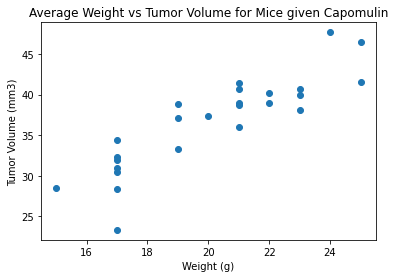

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = treatment_dataframes[0]
capomulin_group = capomulin.groupby('Mouse ID').mean()
plt.scatter(capomulin_group['Weight (g)'], capomulin_group['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Weight vs Tumor Volume for Mice given Capomulin')
plt.show()

## Correlation and Regression

There is a correlation coefficient of 0.8767060403658116 for Mouse Weight vs Tumor Volume


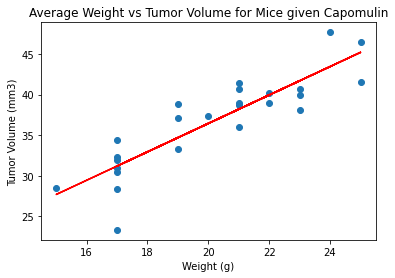

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = capomulin_group['Weight (g)']
y_values = capomulin_group['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
correlation_co = st.pearsonr(x_values,y_values)[0]
print(f"There is a correlation coefficient of {correlation_co} for Mouse Weight vs Tumor Volume")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Weight vs Tumor Volume for Mice given Capomulin')
plt.show()